<a href="https://colab.research.google.com/github/NoorMemonzz/Dynamic-Email-Generator-Python/blob/main/Copy_of_Final_content_diversity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install
!pip install pandas scikit-learn nltk

In [ ]:
#Import the dataset

from google.colab import files
import pandas as pd

# Upload the file from your local machine
uploaded = files.upload()

# Assuming the file is named 'input_updated.csv'
df = pd.read_csv('cleaned_ai_responses_tone.csv')
print(df.head())

Saving cleaned_ai_responses_tone.csv to cleaned_ai_responses_tone.csv
                                         AI Response      Source  \
0  university admissions are open apply now and s...  ChatGPT 4o   
1  ready to take the next step university admissi...  ChatGPT 4o   
2  its time university admissions are open apply ...  ChatGPT 4o   
3  the wait is over apply now for university admi...  ChatGPT 4o   
4  university admissions are open take the next s...  ChatGPT 4o   

            tone language                                Cleaned AI Response  
0   Motivational       en  university admissions are open apply now and s...  
1    Encouraging       en  ready to take the next step university admissi...  
2         Urgent       en  its time university admissions are open apply ...  
3  Inspirational       en  the wait is over apply now for university admi...  
4       Exciting       en  university admissions are open take the next s...  


In [ ]:
#Ensure that the text is cleaned and preprocessed before analyzing similarity. You can tokenize the text, remove stop words, and perform stemming/lemmatization. DONE

In [ ]:
#Vectorize the text

#Need to convert the text into numerical vectors. The most common approach is to use TF-IDF (Term Frequency-Inverse Document Frequency).

!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Transform the cleaned responses into TF-IDF vectors
tfidf_matrix = vectorizer.fit_transform(df['Cleaned AI Response'])

print(tfidf_matrix.shape)  # Should be (number_of_responses, number_of_features)

(3559, 1190)


In [ ]:
#Compute the Pairwise Cosine Similarity

#Now that you have the TF-IDF vectors, you can calculate the cosine similarity between all pairs of responses. The cosine similarity ranges from 0 (completely different) to 1 (identical).

from sklearn.metrics.pairwise import cosine_similarity

# Compute pairwise cosine similarity matrix
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

# Inspect the similarity matrix
import numpy as np
print(np.round(cosine_sim_matrix, 2))  # Round for easier readability

[[1.   0.42 0.51 ... 0.13 0.13 0.08]
 [0.42 1.   0.26 ... 0.09 0.12 0.09]
 [0.51 0.26 1.   ... 0.11 0.11 0.06]
 ...
 [0.13 0.09 0.11 ... 1.   0.08 0.11]
 [0.13 0.12 0.11 ... 0.08 1.   0.05]
 [0.08 0.09 0.06 ... 0.11 0.05 1.  ]]


In [ ]:
#Measure the diversity

#High similarity between responses indicates less diversity.

# Compute average similarity for all pairs of responses
average_similarity = np.mean(cosine_sim_matrix)

print(f"Average Cosine Similarity: {average_similarity:.2f}")

Average Cosine Similarity: 0.09


In [ ]:
#interpret the overall average cosine similarity of the text ---

In [ ]:
#Now calculating the diversity on each AI tool using 'Source' column in the DataFrame
# Group by AI Tool and compute similarities within each group
df['Source'] = df['Source'].astype(str)

# You can now compute average similarity within each AI tool group
from scipy.spatial.distance import pdist, squareform

tool_similarities = {}
for tool in df['Source'].unique():
    tool_indices = df[df['Source'] == tool].index
    tool_responses = cosine_sim_matrix[tool_indices, :][:, tool_indices]
    tool_similarities[tool] = np.mean(tool_responses)

print("Average Similarity per AI Tool:")
for tool, avg_sim in tool_similarities.items():
    print(f"{tool}: {avg_sim:.2f}")

Average Similarity per AI Tool:
ChatGPT 4o: 0.18
Gemini: 0.13
Claude: 0.07
Jasper: 0.08
Pi: 0.14


In [ ]:
#Interpret  ----
#All AI tools show very low average similarity, meaning they produce highly varied and diverse responses.

#Claude produce more diverse content, followed by Jasper, and then Gemini. ChatGPT has high score on similarity test and it produces consistent content. Overall, all generates diverse content.

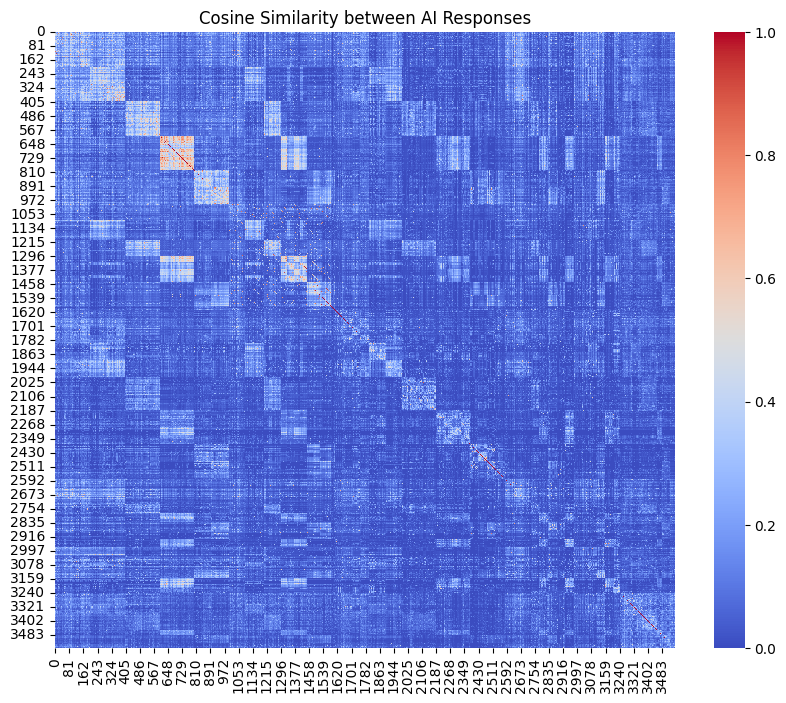

In [ ]:
#Visualize the Similarity Matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the cosine similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title("Cosine Similarity between AI Responses")
plt.show()

In [ ]:
#Interprete ----

#the blue color indicates low cosine similarity, and the warm colors (e.g., red or yellow) would indicate high cosine similarity. Since you're using the coolwarm color map, the blue side represents lower values (closer to 0), and the red side represents higher values (closer to 1).

